In [3]:
from application import Application as App
import timesynth as ts
import matplotlib.pyplot as plt
import random as rd
from xgboost import XGBRegressor
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Text(0.5, 1.0, 'Gaussian Process signal with Matern 3/2-kernel')

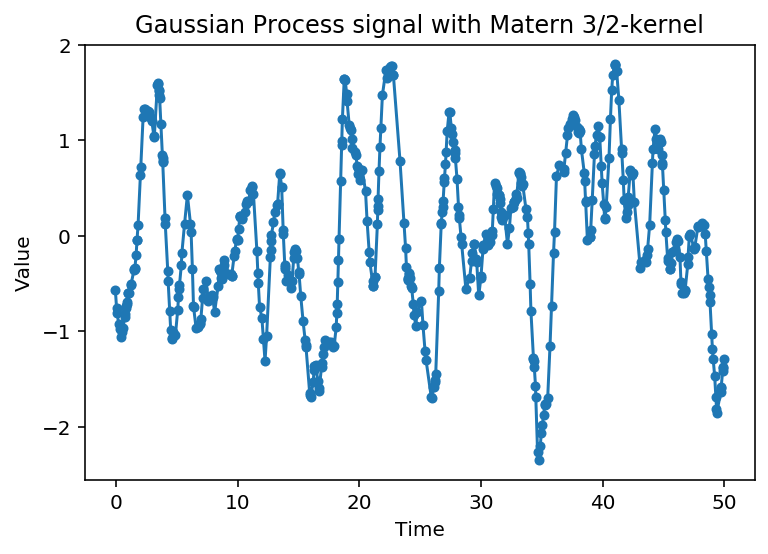

In [4]:
time_sampler = ts.TimeSampler(stop_time=50)
# Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=1000, keep_percentage=50)
white_noise = ts.noise.GaussianNoise(std=0.3)
gp = ts.signals.GaussianProcess(kernel='Matern', nu=3./2)
gp_series = ts.TimeSeries(signal_generator=gp)
samples = gp_series.sample(irregular_time_samples)[0]
plt.plot(irregular_time_samples, samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Gaussian Process signal with Matern 3/2-kernel')

In [5]:
apps={i:App(i) for i in range(5)}

In [6]:
for i in range(5):
    for j in range(5):
        if rd.random()<.18:
            apps[j].addParent(apps[i])

In [7]:
for k,app in apps.items():
    app.fitAndTest()

ID: 0 Score: 1.0211986117709024
ID: 1 Score: 1.4136511809236554
ID: 2 Score: 1.2184926676862526
ID: 3 Score: 2.2515205996764074
ID: 4 Score: 0.9599453618533518


In [8]:
for k,app in apps.items():
    app.fitAndTest(includeParents=True)

TypeError: only integer scalar arrays can be converted to a scalar index

In [15]:
apps[2].parents